# Shinkansen Travel Experience

In [1]:
#Import libraries and set configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import category_encoders as ce
import warnings
import time

from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_log_error, mean_absolute_error, accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier


warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
pd.set_option('display.max_columns', 85)
pd.set_option('isplay.max_rows', 85)

In [2]:
#Load data set
survey_train_df = pd.read_csv("Data/Surveydata_train_(2).csv")
travel_train_df = pd.read_csv("Data/Traveldata_train_(2).csv")

survey_test_df = pd.read_csv("Data/Surveydata_test_(2).csv")
travel_test_df = pd.read_csv("Data/Traveldata_test_(2).csv")

In [3]:
display(survey_train_df.head())
display(travel_train_df.head())

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [4]:
print(survey_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [5]:
travel_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [6]:
travel_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [7]:
survey_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [8]:
# Concatenate survey and travel dataset
train_df = travel_train_df.merge(survey_train_df, how= 'left', on = 'ID')
test_df = travel_test_df.merge(survey_test_df, how= 'left', on = 'ID')
train_df["Source"] = 'train'
test_df["Source"] = 'test'
df = pd.concat([train_df, test_df])

In [9]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Gender                   129874 non-null  object 
 2   Customer_Type            117647 non-null  object 
 3   Age                      129937 non-null  float64
 4   Type_Travel              117307 non-null  object 
 5   Travel_Class             129981 non-null  object 
 6   Travel_Distance          129981 non-null  int64  
 7   Departure_Delay_in_Mins  129895 non-null  float64
 8   Arrival_Delay_in_Mins    129501 non-null  float64
 9   Overall_Experience       94379 non-null   float64
 10  Seat_Comfort             129898 non-null  object 
 11  Seat_Class               129981 non-null  object 
 12  Arrival_Time_Convenient  117726 non-null  object 
 13  Catering                 117883 non-null  object 
 14  Platf

### EDA RAW DATA

In [10]:
# Display statistical summary of dataset
df.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,1.299810e+05,129937.000000,129981.000000,129895.000000,129501.000000,94379.000000
mean,9.914043e+07,39.427138,1981.151591,14.711067,15.088393,0.546658
std,4.780451e+05,15.122312,1026.964654,38.072295,38.464694,0.497821
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000,0.000000
25%,9.883250e+07,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,9.886499e+07,40.000000,1924.000000,0.000000,0.000000,1.000000
75%,9.990311e+07,51.000000,2543.000000,12.000000,13.000000,1.000000
max,9.993560e+07,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [11]:
# Analyze the balance of target variable
df['Overall_Experience'].value_counts(normalize=True)

1.0    0.546658
0.0    0.453342
Name: Overall_Experience, dtype: float64

In [12]:
# Convert target variable from float to object
df['Overall_Experience'] = df['Overall_Experience'].astype('object')

In [13]:
# Create function thath analyze Nan values of a dataframe
def analyze_Nan_None(df):
    # Create a DataFrame to store the results
    result = pd.DataFrame(index=df.columns, columns=['# of NaN', 'Percentage of NaN'])

    # Calculate the number and percentage of NaNs for each column
    for col in df.columns:
        result.loc[col, '# of NaN'] = df[col].isnull().sum()
        result.loc[col, 'Percentage of NaN'] = round(df[col].isnull().mean() * 100,2)
        
    result = result.sort_values(by=['Percentage of NaN'], ascending=False)
    return result

# Analyze Nan values
analyze_Nan_None(df)

,# of NaN,Percentage of NaN
Overall_Experience,35602,27.39
Type_Travel,12674,9.75
Customer_Type,12334,9.49
Arrival_Time_Convenient,12255,9.43
Catering,12098,9.31
Onboard_Service,10473,8.06
Arrival_Delay_in_Mins,480,0.37
Baggage_Handling,182,0.14
Online_Support,117,0.09
Legroom,115,0.09


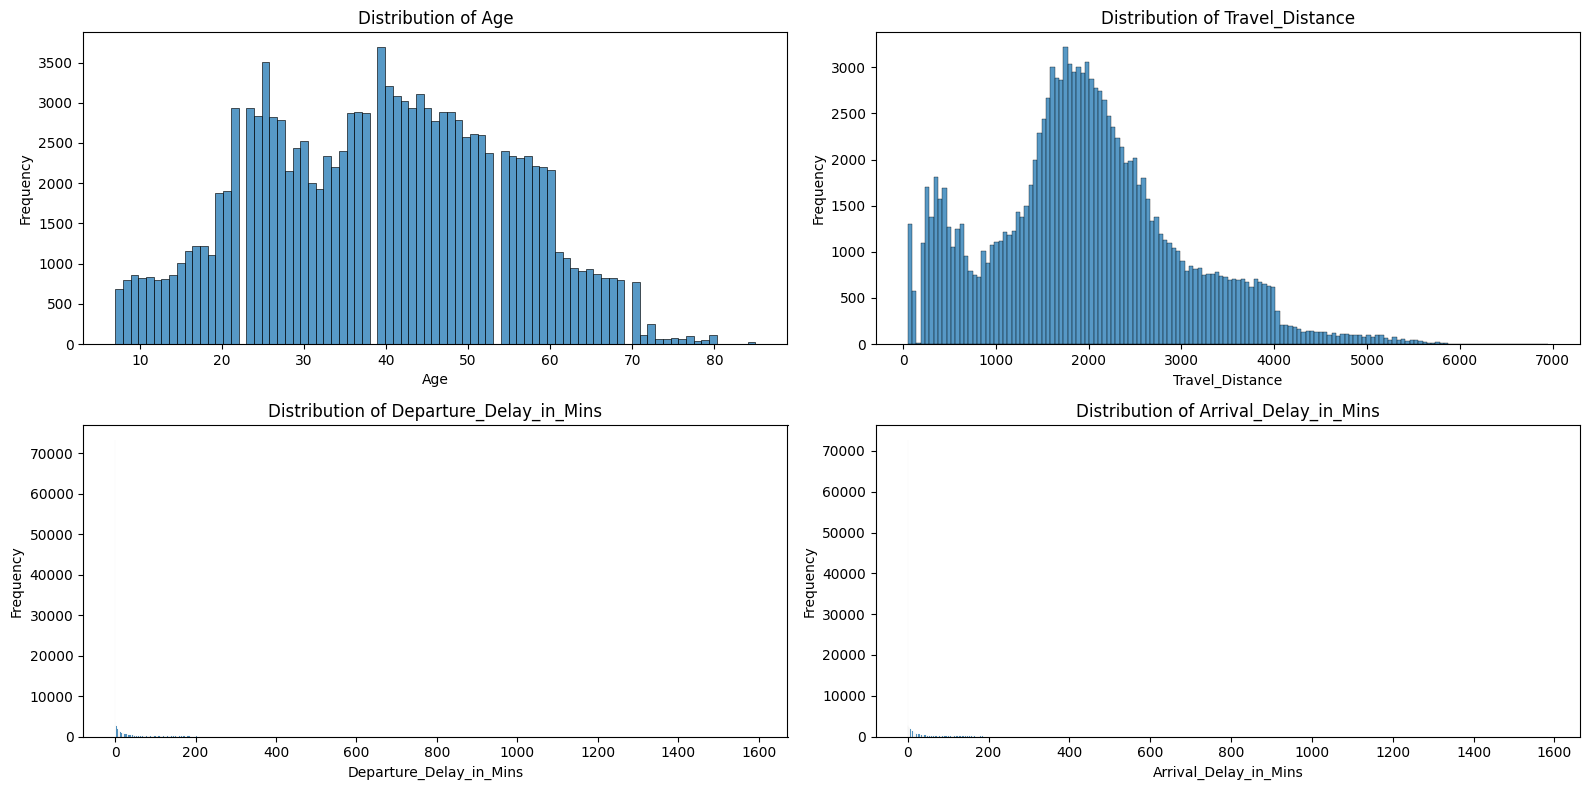

In [14]:
## Histogram of numerical variables

# Filter numeric columns
numerical_cols = df.loc[:, df.columns != 'ID'].select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for subplots
num_vars = len(numerical_cols)
num_cols = int(np.ceil(np.sqrt(num_vars)))
num_rows = int(np.ceil(num_vars / num_cols))

# Set the figure size to make the plots readable
plt.figure(figsize=(16, 4 * num_rows))

# Iterate over the numeric columns and create a distribution plot for each one
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

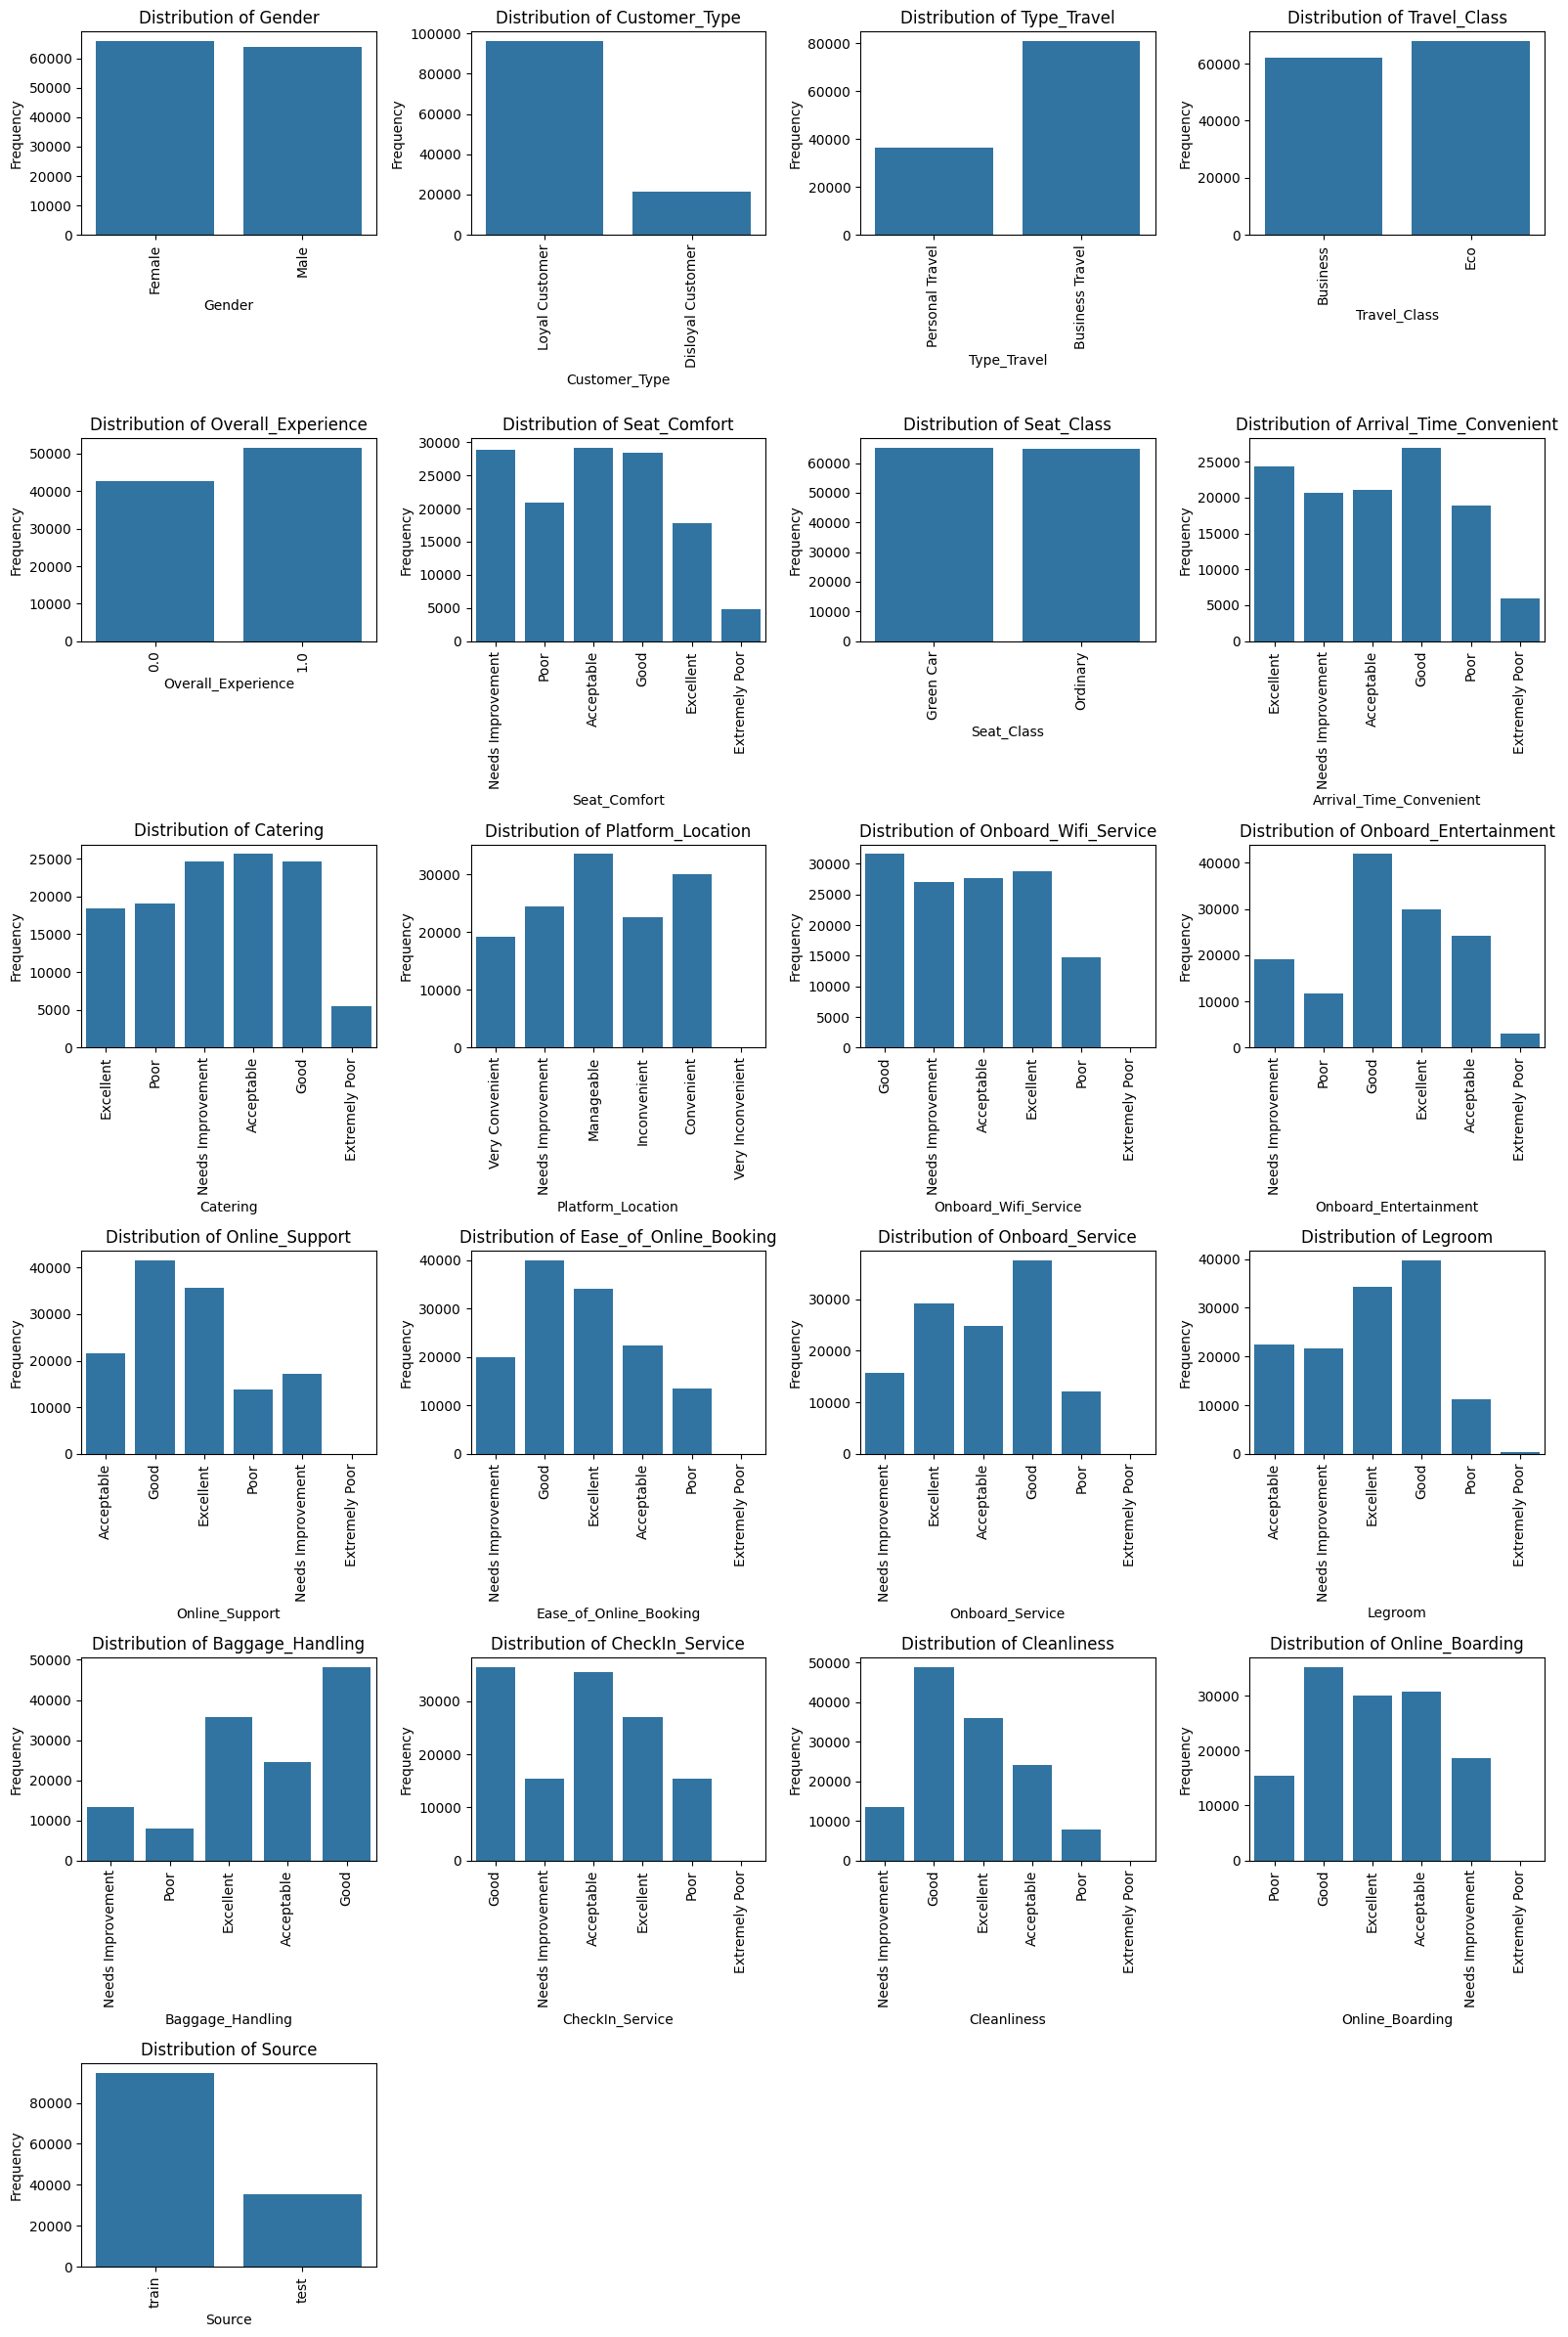

In [15]:
## Countplof of categorical variables
# Filter categorical columns
df.reset_index(drop=True, inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns needed for subplots
num_vars = len(categorical_cols)
num_cols = 4
num_rows = int(np.ceil(num_vars / num_cols))

# Set the figure size to make the plots readable
plt.figure(figsize=(16, 4 * num_rows))

# Iterate over the numeric columns and create a distribution plot for each one
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data = df, x = col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation = 90)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

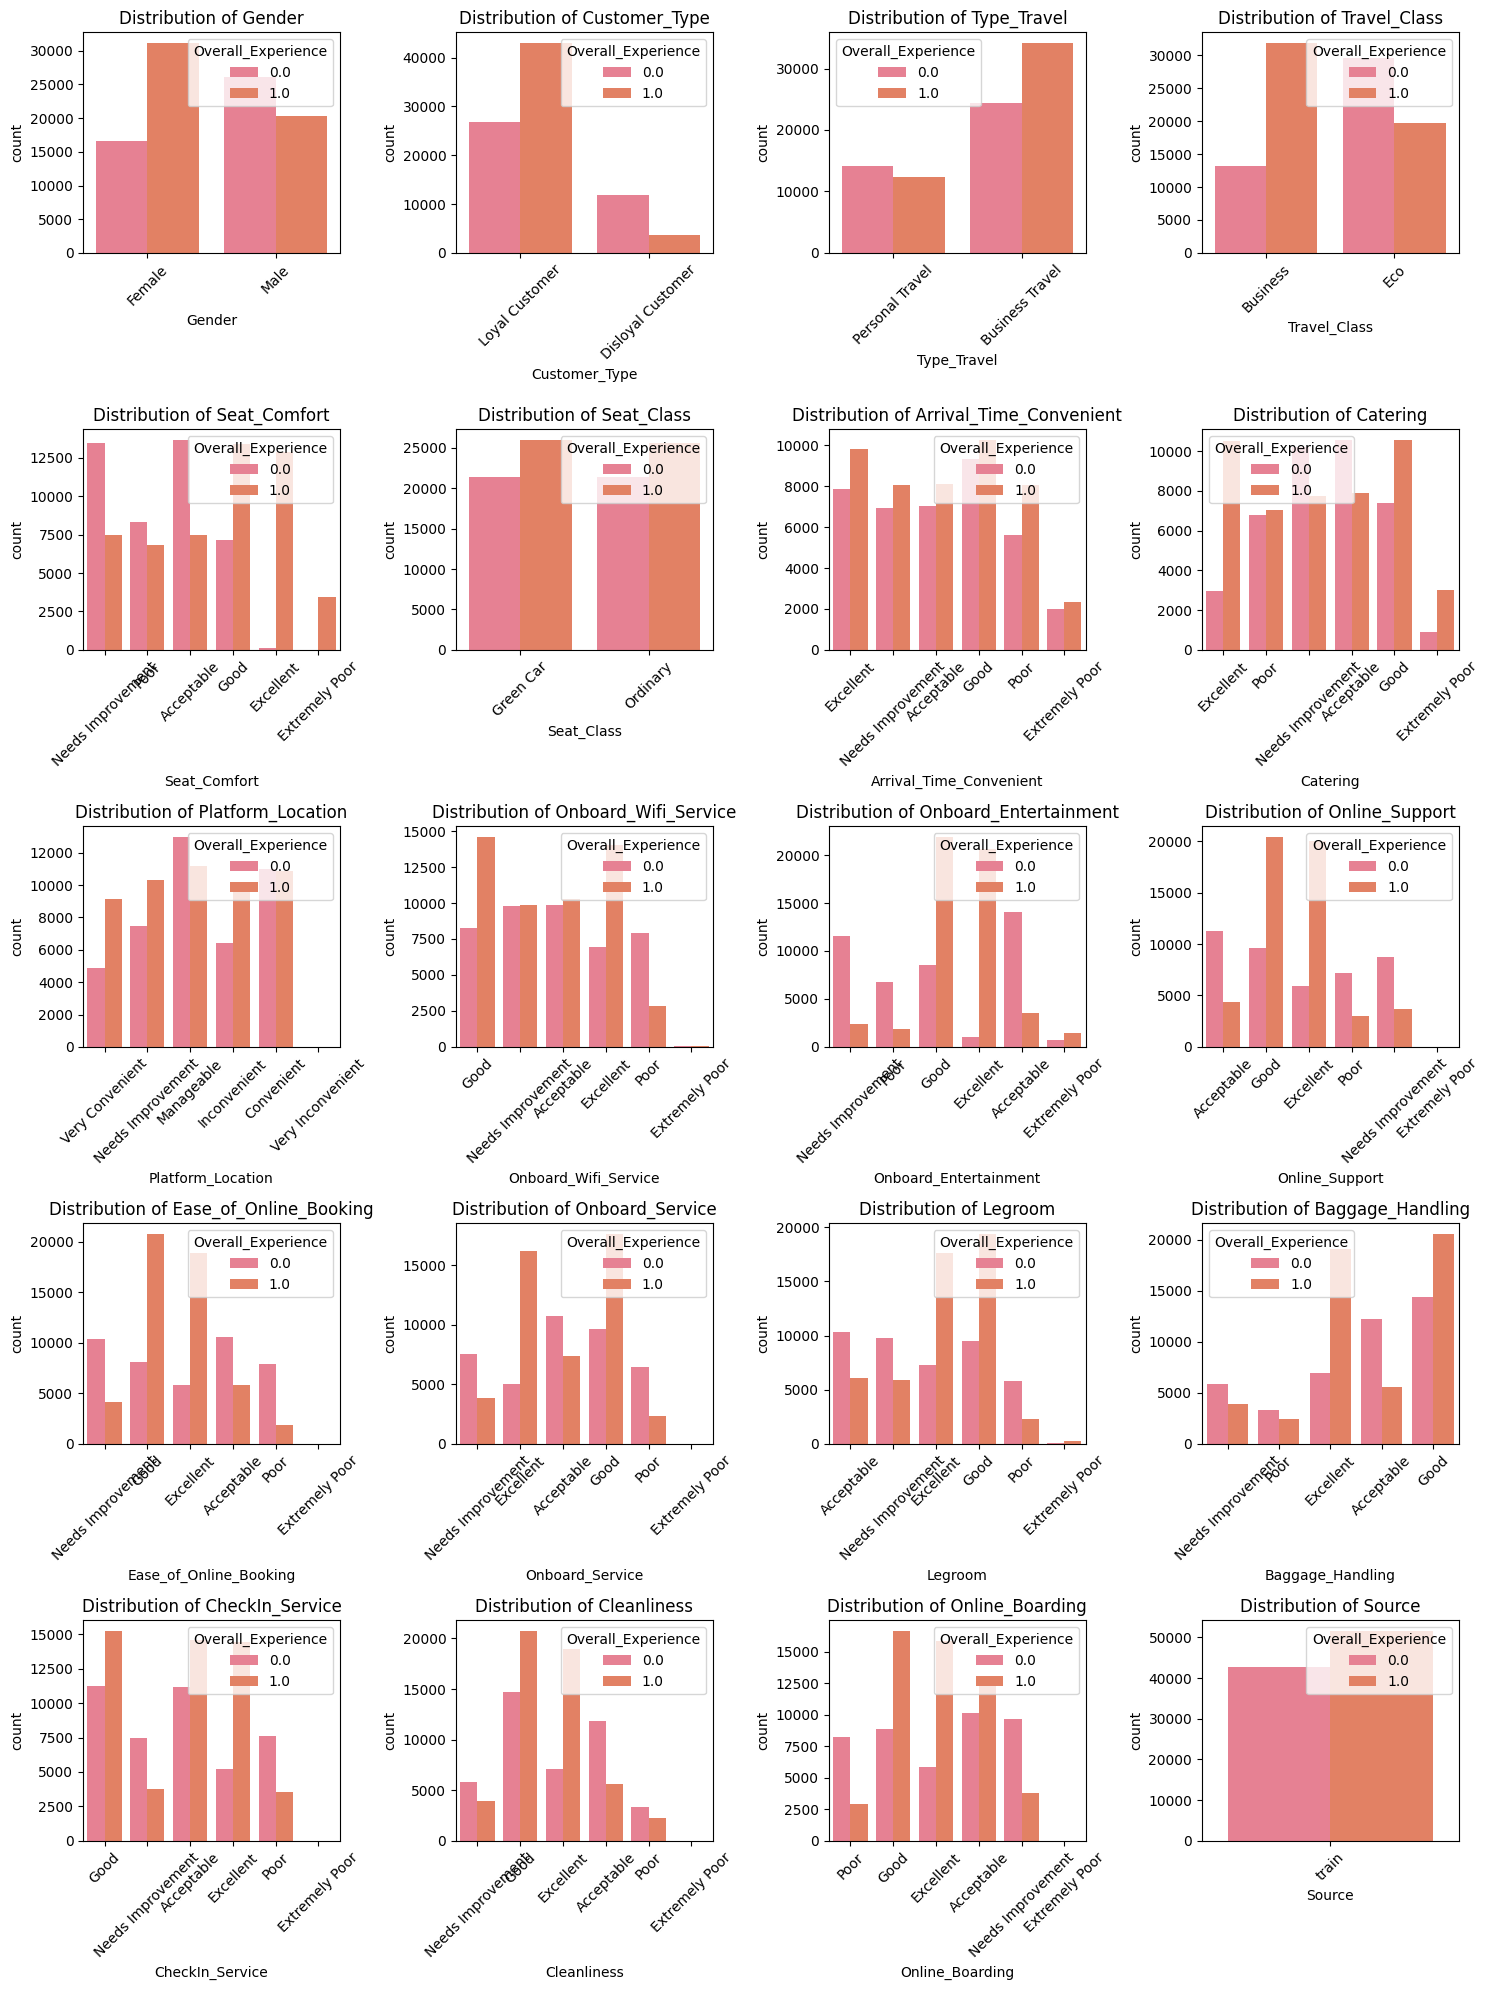

In [16]:
## Distribution of categorical variable vs target variable (only train dataset)

# Select categorical columns (excluding the 'Overall_Experience' column)
categorical_cols = df.drop(['Overall_Experience'], axis =1 ).select_dtypes(include=['object']).columns

# Define the number of columns and rows
num_cols = 4
num_rows = -(-len(categorical_cols) // num_cols) 

# Create a figure and a grid of subplots with the specified size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axs = axs.ravel()

# Create a countplot using Seaborn, comparing the categorical column to 'Overall_Experience'
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Overall_Experience', data= df[df['Source'] == 'train'], palette=sns.color_palette("husl", 20), ax=axs[i])
    
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Hide any remaining empty subplots
for j in range(i + 1, num_cols * num_rows):
    axs[j].axis('off')

# Adjust and display the subplot grid
plt.tight_layout()
plt.show()

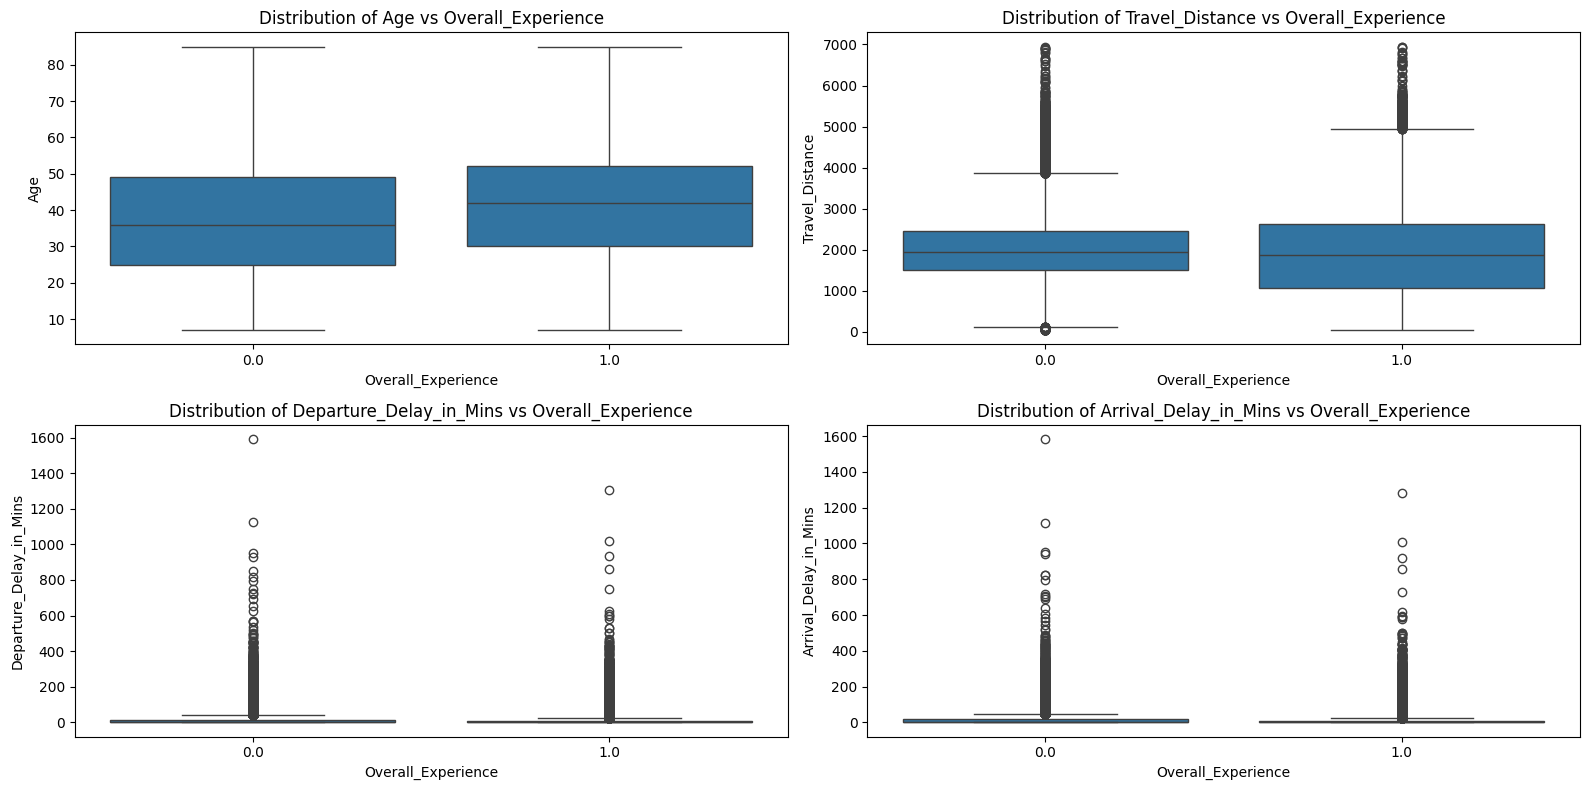

In [17]:
## ## Distribution of numerical variables vs target variable (only train dataset)

# Calculate the number of rows and columns needed for subplots
num_vars = len(numerical_cols)
num_cols = int(np.ceil(np.sqrt(num_vars)))
num_rows = int(np.ceil(num_vars / num_cols))

# Set the figure size to make the plots readable
plt.figure(figsize=(16, 4 * num_rows))

# Iterate over the numeric columns and create a distribution plot for each one
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data= df[df['Source'] == 'train'], y= col, x= 'Overall_Experience')
    plt.title(f'Distribution of {col} vs Overall_Experience')
    plt.xlabel('Overall_Experience')
    plt.ylabel(col)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()   

In [18]:
def get_statistics(df, columns):
    # Define the percentiles we want to calculate
    percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
    
    # Create a dictionary to store the results
    results = {}
    
    # Iterate over each column to calculate the statistics
    for col in columns:
        # Make sure the column exists in the DataFrame
        if col in df:
            # Calculate the statistics for the current column
            statistics = {
                'count': df[col].count(),
                'mean': df[col].mean(),
                'min': df[col].min(),
                'percentile1': np.percentile(df[col].dropna(), 1),
                'percentile10': np.percentile(df[col].dropna(), 10),
                'percentile25': np.percentile(df[col].dropna(), 25),
                'median': np.percentile(df[col].dropna(), 50),
                'percentile75': np.percentile(df[col].dropna(), 75),
                'percentile90': np.percentile(df[col].dropna(), 90),
                'percentile99': np.percentile(df[col].dropna(), 99),
                'max': df[col].max(),
            }
            # Add the statistics to the results dictionary
            results[col] = statistics
        else:
            print(f"The column '{col}' does not exist in the DataFrame.")
    
    # Convert the results dictionary into a DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    
    return results_df

columns_name = ['Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']
statistics_df = get_statistics(df, columns_name)
statistics_df


,count,mean,min,percentile1,percentile10,percentile25,median,percentile75,percentile90,percentile99,max
Travel_Distance,129981.0,1981.151591,50.0,97.0,545.0,1359.0,1924.0,2543.0,3399.0,4819.2,6951.0
Departure_Delay_in_Mins,129895.0,14.711067,0.0,0.0,0.0,0.0,0.0,12.0,44.0,180.0,1592.0
Arrival_Delay_in_Mins,129501.0,15.088393,0.0,0.0,0.0,0.0,0.0,13.0,44.0,182.0,1584.0


In [19]:
mapping_survey_columns = {
    'Extremely Poor': 0,
    'Poor': 1,
    'Needs Improvement': 2,
    'Acceptable': 3,
    'Good': 4,
    'Excellent': 5
}

mapping_platform_location = {
    'Very Inconvenient': 0,
    'Inconvenient' : 1,
    'Needs Improvement': 2,
    'Manageable': 3,
    'Convenient': 4,
    'Very Convenient': 5
}

mapping_gender = {'Female': 0, 'Male': 1}
mapping_customer_type = {'Loyal Customer': 1, 'Disloyal Customer': 0}
mapping_type_travel = {'Personal Travel': 0, 'Business Travel': 1}
mapping_travel_class = {'Eco': 0, 'Business': 1}
mapping_seat_class = {'Ordinary': 0, 'Green Car': 1}

In [20]:
df1 = df.copy()
columns_to_numeric = ['Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service',
                      'Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service',
                      'Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']
for col in columns_to_numeric:
    df1[col] = df[col].map(mapping_survey_columns)

    
df1['Platform_Location'] = df['Platform_Location'].map(mapping_platform_location)
df1['Gender'] = df['Gender'].map(mapping_gender)
df1['Customer_Type'] = df['Customer_Type'].map(mapping_customer_type)
df1['Type_Travel'] = df['Type_Travel'].map(mapping_type_travel)
df1['Travel_Class'] = df['Travel_Class'].map(mapping_travel_class)
df1['Seat_Class'] = df['Seat_Class'].map(mapping_seat_class)
df1['Overall_Experience'] = df[df['Source'] == 'train']['Overall_Experience'].astype(int)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129981 entries, 0 to 129980
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Gender                   129874 non-null  float64
 2   Customer_Type            117647 non-null  float64
 3   Age                      129937 non-null  float64
 4   Type_Travel              117307 non-null  float64
 5   Travel_Class             129981 non-null  int64  
 6   Travel_Distance          129981 non-null  int64  
 7   Departure_Delay_in_Mins  129895 non-null  float64
 8   Arrival_Delay_in_Mins    129501 non-null  float64
 9   Overall_Experience       94379 non-null   float64
 10  Seat_Comfort             129898 non-null  float64
 11  Seat_Class               129981 non-null  int64  
 12  Arrival_Time_Convenient  117726 non-null  float64
 13  Catering                 117883 non-null  float64
 14  Plat

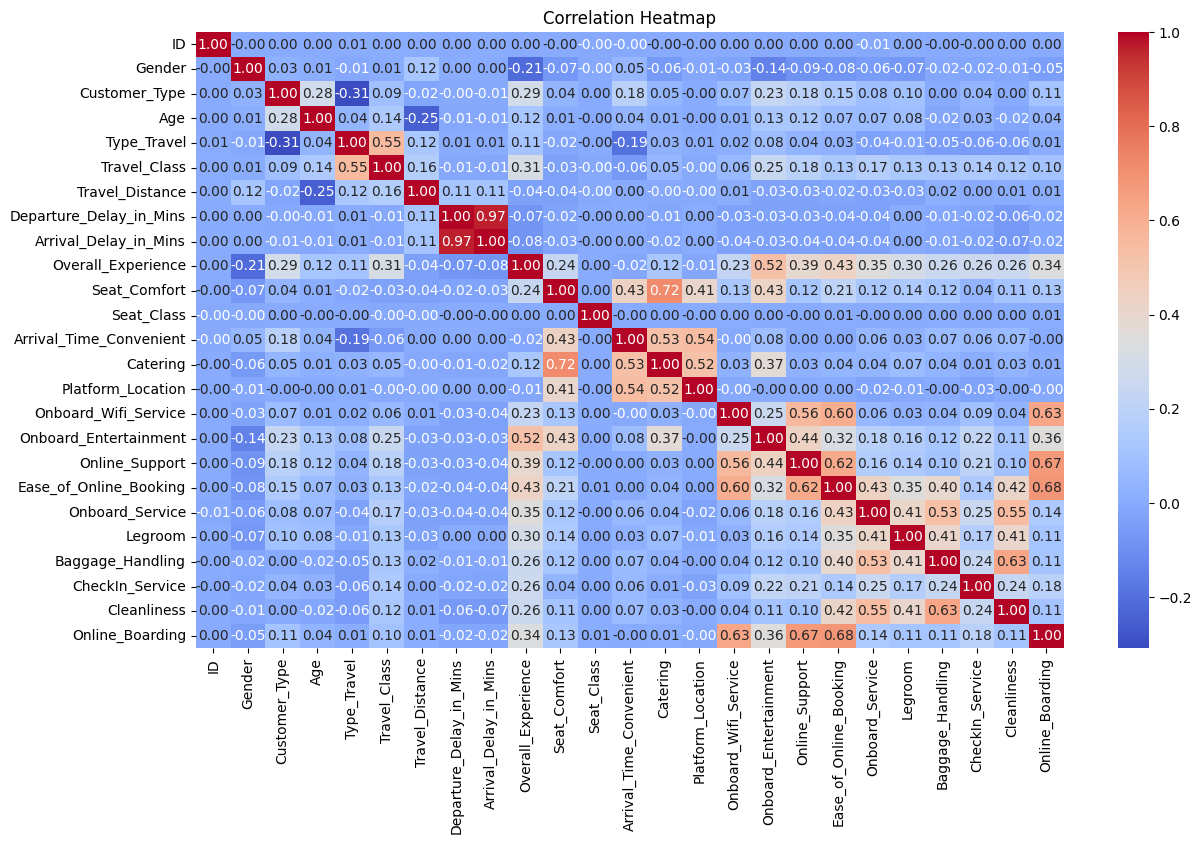

In [22]:
# Compute correlation matrix 
top_corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Handle null values

In [23]:
# Impute the mean to the missing values of 'Age' and 'Departure_Delay_in_Mins'
df1['Age'] = df1['Age'].fillna(int(df1['Age'].mean()))
df1['Departure_Delay_in_Mins'] = df1['Departure_Delay_in_Mins'].fillna(df1['Departure_Delay_in_Mins'].mean())

In [24]:
# Impute the mode to variables that have less than 1% missing values
cols_mode = ['Gender', 'Baggage_Handling', 'Legroom', 'Online_Support', 'CheckIn_Service', 'Ease_of_Online_Booking', 'Seat_Comfort', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Cleanliness', 'Online_Boarding']
for col in cols_mode:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

In [25]:
# Impute by regression 'Arrivals_Delay_in_Mins'
valid_rows = df1.dropna(subset=['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'])
X = valid_rows[['Departure_Delay_in_Mins']]
y = valid_rows['Arrival_Delay_in_Mins']

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Select only the rows where 'Arrival_Delay_in_Mins' is NaN but 'Departure_Delay_in_Mins' is not
missing_arrival = df1['Arrival_Delay_in_Mins'].isnull() & df1['Departure_Delay_in_Mins'].notnull()
X_missing = df1.loc[missing_arrival, ['Departure_Delay_in_Mins']]

# Predict the missing values and assign them
predicted_arrival = model.predict(X_missing)
df1.loc[missing_arrival, 'Arrival_Delay_in_Mins'] = predicted_arrival

In [26]:
mode_by_travel_class = df1.groupby('Travel_Class')['Type_Travel'].agg(pd.Series.mode)

# Impute the missing values in 'Type_Travel' based on 'Travel_Class'
for travel_class, mode in mode_by_travel_class.items():
    # Assuming the mode always returns a single value per group, which may not always be the case
    if isinstance(mode, pd.Series) and not mode.empty:
        mode = mode.iloc[0]
    mask = df1['Type_Travel'].isnull() & (df1['Travel_Class'] == travel_class)
    df1.loc[mask, 'Type_Travel'] = df1.loc[mask, 'Type_Travel'].fillna(mode)

In [27]:
# Direct imputation for records with 'Travel_Class' == 'Business'
df1.loc[(df1['Travel_Class'] == 1) & (df1['Customer_Type'].isna()), 'Customer_Type'] = 1


# Filter the DataFrame to train only with records that do not have NaN in 'Customer_Type_Num'
df_train = df1.dropna(subset=['Customer_Type', 'Age'])

# Prepare X and y for the model
X = df_train[['Age']]
y = df_train['Customer_Type']

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict Customer_Type for the missing records
# Filter to get only those records needed for the prediction
df_missing = df1[(df1['Customer_Type'].isna()) & (df1['Travel_Class'] != 1)]

# Perform predictions
predicted = model.predict(df_missing[['Age']])

# Convert the numerical predictions back to categorical
df1.loc[df_missing.index, 'Customer_Type'] = np.where(predicted > 0.5, 1, 0)


In [28]:
# Impute missing 'Catering' values with corresponding 'Seat_Comfort' values
df1.loc[df['Catering'].isna(), 'Catering'] = df1[df1['Catering'].isna()]['Seat_Comfort'] 

In [29]:
# Impute missing 'Onboard_Service' values with corresponding 'Cleanliness' values
df1.loc[df1['Onboard_Service'].isna(), 'Onboard_Service'] = df1[df1['Onboard_Service'].isna()]['Cleanliness'] 

In [30]:
analyze_Nan_None(df1)

,# of NaN,Percentage of NaN
Overall_Experience,35602,27.39
Arrival_Time_Convenient,12255,9.43
ID,0,0.0
Platform_Location,0,0.0
Online_Boarding,0,0.0
Cleanliness,0,0.0
CheckIn_Service,0,0.0
Baggage_Handling,0,0.0
Legroom,0,0.0
Onboard_Service,0,0.0


## Data Cleaning

In [31]:
df2 = df1.drop(columns=['Arrival_Time_Convenient', 'Seat_Class'])

In [32]:
# display statistics of numerical variables
get_statistics(df2, columns_name)

,count,mean,min,percentile1,percentile10,percentile25,median,percentile75,percentile90,percentile99,max
Travel_Distance,129981.0,1981.151591,50.0,97.0,545.0,1359.0,1924.0,2543.0,3399.0,4819.200000,6951.0
Departure_Delay_in_Mins,129981.0,14.711067,0.0,0.0,0.0,0.0,0.0,12.0,44.0,180.000000,1592.0
Arrival_Delay_in_Mins,129981.0,15.157134,0.0,0.0,0.0,0.0,0.0,13.0,44.0,182.852341,1584.0


In [33]:
# Calculate the 99th percentile of 'Arrival_Delay_in_Mins' (only in train dataset) 
percentile_99 = df2[df2['Source'] == 'train']['Arrival_Delay_in_Mins'].quantile(0.99)

# Filter rows in df1 to only include those within the 99th percentile of arrival delays
df2 = df2[(df2['Source'] != 'train') | (df2['Arrival_Delay_in_Mins'] <= percentile_99)]
df2

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Source
0,98800001,0.0,1.0,52.0,1.0,1,272,0.0,5.0,0.0,2.0,5.0,5.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,train
1,98800002,1.0,1.0,48.0,0.0,0,2200,9.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0,train
2,98800003,0.0,1.0,43.0,1.0,1,1061,77.0,119.0,1.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,train
3,98800004,0.0,1.0,44.0,1.0,1,780,13.0,18.0,0.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,train
4,98800005,0.0,1.0,50.0,1.0,1,1981,0.0,0.0,1.0,3.0,3.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129976,99935598,1.0,1.0,8.0,0.0,0,1334,0.0,0.0,NaN,2.0,2.0,3.0,3.0,2.0,3.0,3.0,4.0,5.0,4.0,3.0,4.0,3.0,test
129977,99935599,0.0,1.0,53.0,1.0,1,1772,0.0,0.0,NaN,2.0,4.0,2.0,3.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,test
129978,99935600,1.0,0.0,22.0,1.0,0,1180,0.0,0.0,NaN,4.0,4.0,2.0,2.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0,5.0,2.0,test
129979,99935601,0.0,1.0,67.0,0.0,0,420,23.0,16.0,NaN,5.0,5.0,1.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,test


In [34]:
# display statistics of numerical variables
get_statistics(df2, columns_name)

,count,mean,min,percentile1,percentile10,percentile25,median,percentile75,percentile90,percentile99,max
Travel_Distance,129042.0,1973.792928,50.0,96.0,541.0,1352.25,1918.0,2535.0,3388.9,4790.0,6951.0
Departure_Delay_in_Mins,129042.0,12.903498,0.0,0.0,0.0,0.00,0.0,12.0,41.0,143.0,978.0
Arrival_Delay_in_Mins,129042.0,13.302692,0.0,0.0,0.0,0.00,0.0,13.0,42.0,145.0,970.0


## Feature Engineering

In [35]:
## Importance of Variables in Long Travels

# List of predictor variables
features = [
    'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
    'Legroom', 'Ease_of_Online_Booking', 'Onboard_Service', 'Baggage_Handling',
    'Cleanliness', 'CheckIn_Service', 'Online_Boarding', 'Seat_Comfort', 'Platform_Location'
]

# Ensure there are no missing values in the predictor variables and the target variable
df_importances_long = df2[df2['Travel_Distance'] >= 550].dropna(subset=features + ['Overall_Experience'])

# Separate predictor variables (X) and the target variable (y)
X = df_importances_long[features]
y = df_importances_long['Overall_Experience']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Get the importance of features
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize the importance of each feature
importances_long = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_long)
# Convert the DataFrame of feature importances to a dictionary for easier access
importances_long= pd.Series(importances_long.Importance.values,index=importances_long.Feature).to_dict()


Model accuracy: 0.933908617330099
                   Feature  Importance
2    Onboard_Entertainment    0.278531
11            Seat_Comfort    0.147250
5   Ease_of_Online_Booking    0.085062
3           Online_Support    0.076002
4                  Legroom    0.058450
0                 Catering    0.054815
6          Onboard_Service    0.054507
10         Online_Boarding    0.049122
12       Platform_Location    0.042853
9          CheckIn_Service    0.041328
7         Baggage_Handling    0.040894
8              Cleanliness    0.037289
1     Onboard_Wifi_Service    0.033896


In [36]:
## Importance of Variables in Short Travels

# Ensure there are no missing values in the predictor variables and the target variable
df_importances_short = df2[df2['Travel_Distance'] < 550].dropna(subset=features + ['Overall_Experience'])

# Separate predictor variables (X) and the target variable (y)
X = df_importances_short[features]
y = df_importances_short['Overall_Experience']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Get the importance of features
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize the importance of each feature
importances_short = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_short)

# Convert the DataFrame of feature importances to a dictionary for easier access
importances_short= pd.Series(importances_short.Importance.values,index=importances_short.Feature).to_dict()


Model accuracy: 0.9459459459459459
                   Feature  Importance
4                  Legroom    0.153587
11            Seat_Comfort    0.122979
5   Ease_of_Online_Booking    0.101341
2    Onboard_Entertainment    0.083940
3           Online_Support    0.075573
6          Onboard_Service    0.069821
7         Baggage_Handling    0.065787
8              Cleanliness    0.062762
10         Online_Boarding    0.059361
0                 Catering    0.058808
9          CheckIn_Service    0.057716
12       Platform_Location    0.047467
1     Onboard_Wifi_Service    0.040859


In [37]:
# Calculate a weighted mean based on travel distance using specified weights.
def weighted_mean(row, weights_long, weights_short):
    weights = weights_long if row['Travel_Distance'] >= 550 else weights_short
    weighted_sum = sum(row[feature] * weight for feature, weight in weights.items())
    sum_of_weights = sum(weights.values())
    return round(weighted_sum / sum_of_weights)


# Create new variable 'weighted_mean'
df2['weighted_mean'] = df2.apply(weighted_mean, axis=1, args=(importances_long, importances_short))

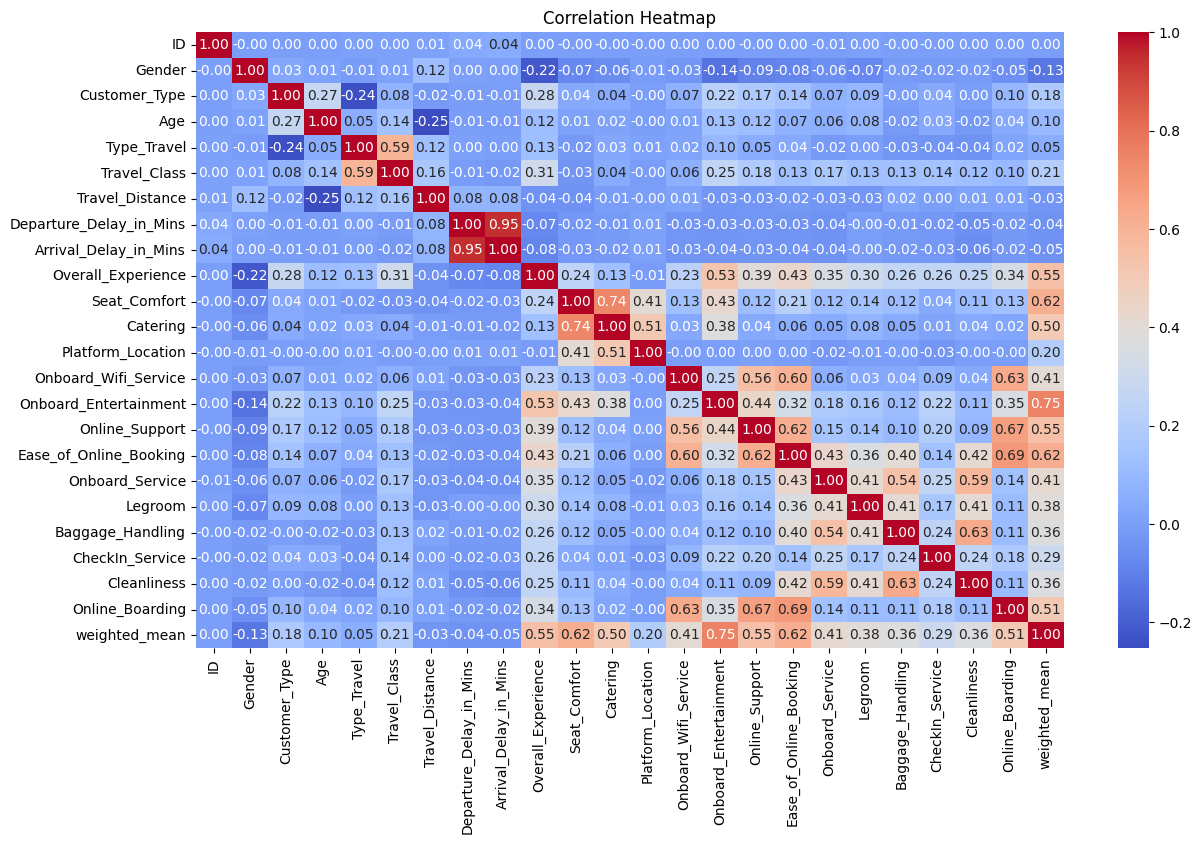

In [38]:
# compute matrix correlation 
top_corr_matrix = df2.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [39]:
# Calculate the rate of departure delay per unit of travel distance
df2['rate_Departure_Delay'] = df2['Departure_Delay_in_Mins'] / df2['Travel_Distance']

# Calculate the rate of arrival delay per unit of travel distance
df2['rate_Arrival_Delay'] = df2['Arrival_Delay_in_Mins'] / df2['Travel_Distance']


## XGBoost Regressor

In [40]:
# Filter training data
train_data = df2[df2['Source'] == 'train'].drop(columns=['ID', 'rate_Departure_Delay', 'rate_Arrival_Delay', 
                               'Arrival_Delay_in_Mins','Departure_Delay_in_Mins', 'Source'])

# Select features and target variable
X = train_data.drop(columns=['Overall_Experience'])
y = train_data['Overall_Experience']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Define parameters
xgb_params = {
    'objective': 'binary:logistic',
    'max_depth': 5,  
    'learning_rate': 0.01,  
    'n_estimators': 5000,  
    'min_child_weight': 1,  
    'colsample_bytree': 0.5,  
    'subsample': 0.3, 
    'reg_alpha': 7,
    'reg_lambda': 0.001,
    'num_parallel_tree': 1,
}

# Optimize and train the XGBoost model
model_xgb = XGBClassifier(**xgb_params)
model_xgb.fit(X_train, y_train)

predictions_xgb = model_xgb.predict(X_test)


# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions_xgb)
print(f"Accuracy del modelo: {accuracy}")

Accuracy del modelo: 0.9499143835616438


In [42]:
# Prepare the test data
test_data = df2[df2['Source'] == 'test'].drop(columns=['ID', 'rate_Departure_Delay', 'rate_Arrival_Delay', 
                               'Arrival_Delay_in_Mins','Departure_Delay_in_Mins', 'Source', 'Overall_Experience'])
# Get the test IDs
test_id = df2[df2['Source'] == 'test']['ID']

# Make predictions on the test data
predictions_xgb = model_xgb.predict(test_data)


In [43]:
# make a dataframe and save it as a csv for submission
submission_df = pd.DataFrame({'Id': test_id, 'Overall_Experience': predictions_xgb})
submission_df.to_csv('submission.csv', index=False)

# print dataframe
submission_df

,Id,Overall_Experience
94379,99900001,1
94380,99900002,1
94381,99900003,1
94382,99900004,0
94383,99900005,1
...,...,...
129976,99935598,0
129977,99935599,1
129978,99935600,1
129979,99935601,1
